In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
from tqdm import tqdm

In [11]:
DATADIR = "D:/odonata"
CATEGORIES = np.array(os.listdir(DATADIR))
IMG_SIZE = 200

CATEGORIES = np.fromiter(
    (category for category in CATEGORIES if len(os.listdir(os.path.join(DATADIR, category))) > 400),
    dtype = CATEGORIES.dtype
)

print(len(CATEGORIES))

54


In [12]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = np.where(CATEGORIES == category)[0][0]
        
        for _ in tqdm(range(400)):
            try:
                img_array = cv2.imread(os.path.join(path, os.listdir(path)[_]), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

# print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:02<00:00, 155.22it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:02<00:00, 194.47it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:02<00:00, 143.15it/s]

21599


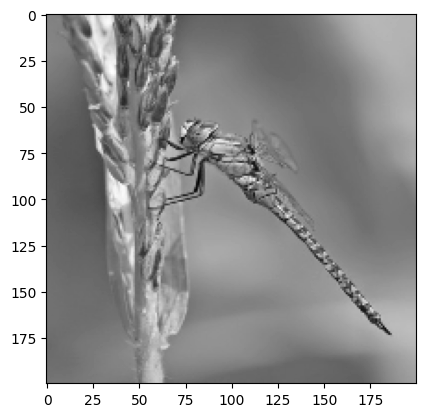

In [13]:
plt.imshow(training_data[0][0], cmap='gray')
plt.show()

In [14]:
random.shuffle(training_data)

In [15]:
for sample in training_data[:10]:
    print(sample[1])

11
28
41
20
5
17
48
39
17
22


In [16]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [17]:
pickle_out = open("D:/X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("D:/y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [18]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

In [19]:
pickle_in = open("D:/X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("D:/y.pickle", "rb")
y = pickle.load(pickle_in)

X = X / 255.0

In [20]:
y = to_categorical(y)

# print(y[0:2])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]


In [21]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu',
                  input_shape=(200, 200, 1), padding='same'),
    Conv2D(32, (3, 3),
                  activation='relu',
                  padding='same'),
    Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same'),
  
  
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(54, activation='softmax')
])

model.compile(
    loss=CategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['AUC', 'accuracy']
)


model.fit(x=X, y=y, batch_size=64, epochs=3, verbose=1, validation_split=0.1)

Epoch 1/3


C:\Users\User\Desktop\py_ai\venv\lib\site-packages\keras\backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 30/304 [=>............................] - ETA: 1:24:07 - loss: 4.4714 - auc: 0.5186 - accuracy: 0.0177

ResourceExhaustedError: Graph execution error:

Detected at node 'Square_8' defined at (most recent call last):
    File "C:\Users\User\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\User\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\User\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "C:\Users\User\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "C:\Users\User\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\User\AppData\Local\Temp\ipykernel_21020\1181353801.py", line 54, in <module>
      model.fit(x=X, y=y, batch_size=64, epochs=3, verbose=1, validation_split=0.1)
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\keras\engine\training.py", line 1054, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\keras\optimizers\optimizer.py", line 543, in minimize
      self.apply_gradients(grads_and_vars)
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\keras\optimizers\optimizer.py", line 1174, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\keras\optimizers\optimizer.py", line 650, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\keras\optimizers\optimizer.py", line 1200, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\keras\optimizers\optimizer.py", line 1250, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\keras\optimizers\optimizer.py", line 1247, in apply_grad_to_update_var
      return self._update_step(grad, var)
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\keras\optimizers\optimizer.py", line 240, in _update_step
      self.update_step(gradient, variable)
    File "C:\Users\User\Desktop\py_ai\venv\lib\site-packages\keras\optimizers\adam.py", line 195, in update_step
      v.assign_add((tf.square(gradient) - v) * (1 - self.beta_2))
Node: 'Square_8'
OOM when allocating tensor with shape[1280000,256] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node Square_8}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_2952]

In [10]:
class_vector =[2, 5, 6, 1, 4, 2, 3, 2]

a = np.array(class_vector)
print(np.where(a == 6)[0][0])
  
# Applying the function on input class vector
from keras.utils import to_categorical
output_matrix = to_categorical(class_vector)
  
print(output_matrix.shape)

2
(8, 7)
